**********


In [1]:
# Adding State column by reading codebook
value_mappings = pd.read_excel(open('finance_data/codebook_districts_ccd_finance.xls', 'rb'),
              sheet_name='values')

fips_codes = value_mappings[value_mappings["format"] == "fips"].set_index('code').code_label.to_dict()
finance_df["state_name"] = finance_df["fips"].map(fips_codes)
print(finance_df.columns)
finance_df

NameError: name 'pd' is not defined

In [20]:
#Table for Expediture for instruction
finance_expediture_for_instruction_df = finance_df
new = finance_df[["year",'leaid','state_name','censusid',"exp_current_instruction_total"]]
print(new)

        year    leaid state_name      censusid  exp_current_instruction_total
0       1991   100005    Alabama  1.504840e+07                      6231000.0
1       1991   100006    Alabama  1.504800e+07                     12164000.0
2       1991   100007    Alabama  1.503740e+07                     16109000.0
3       1991   100030    Alabama  1.506200e+07                      7557000.0
4       1991   100060    Alabama  1.502000e+07                      4895000.0
...      ...      ...        ...           ...                            ...
406617  2016  5680250    Wyoming  5.150204e+13                           -2.0
406618  2016  5680251    Wyoming -2.000000e+00                           -2.0
406619  2016  5680252    Wyoming -2.000000e+00                           -2.0
406620  2016  5680253    Wyoming -2.000000e+00                           -2.0
406621  2016  5680254    Wyoming -2.000000e+00                           -2.0

[406622 rows x 5 columns]


In [21]:
# Group by state and year and aggregate total expediture for instruction  

finance_df_grouped = new.groupby(['state_name', "year"]).agg(
    {'exp_current_instruction_total': ['sum'] }).reset_index() #To DO - fix data so it formats without row "sum"


finance_df_grouped.to_csv("Instructional Spend Grouped By State-Year.csv", float_format=None, columns=None, header=True, index=True)
# finance_df_grouped.assets_bond_fund.sum 

In [22]:
#Import file with race of student using a parquet file - done in gogole visual studio b/c the file is still too large to transpose 

#To Do**  - change the years in the parquet file to be from 1991-2018, so we can merge on the two data files

 #import pandas as pd 

 #!pip install pyarrow

#Read parquet File

mydataframe = pd.read_parquet('schools_ccd_lea_enrollment_df_pyarrow.parquet.gzip')

mydataframe.head(3)

,year,leaid,fips,grade,race,sex,enrollment,state_name,grade_name,race_name,sex_name
0,1999,100002,1,3,1,1,0.0,Alabama,3,White,Male
1,1999,100002,1,3,1,2,0.0,Alabama,3,White,Female
2,1999,100002,1,3,1,99,0.0,Alabama,3,White,Total


In [33]:
mydataframe.groupby(['state_name']).agg({'year': ['min', 'max'] }).reset_index() # finding min/max for years for mydataframe

state_name  year      
                     min   max
0          Alabama  1986  2018
1           Alaska  1986  2018
2   American Samoa  1986  2018
3          Arizona  1986  2018
4         Arkansas  1986  2018
..             ...   ...   ...
56        Virginia  1986  2018
57      Washington  1986  2018
58   West Virginia  1986  2018
59       Wisconsin  1986  2018
60         Wyoming  1986  2018

[61 rows x 3 columns]

In [24]:
finance_df_grouped.groupby(['state_name']).agg({'year': ['min', 'max'] }).reset_index() # finding min/max for years for finance_df_grouped

state_name  year      
                           min   max
0                Alabama  1991  2016
1                 Alaska  1991  2016
2                Arizona  1991  2016
3               Arkansas  1991  2016
4             California  1991  2016
5               Colorado  1991  2016
6            Connecticut  1991  2016
7               Delaware  1991  2016
8   District of Columbia  1991  2016
9                Florida  1991  2016
10               Georgia  1991  2016
11                Hawaii  1991  2016
12                 Idaho  1991  2016
13              Illinois  1991  2016
14               Indiana  1991  2016
15                  Iowa  1991  2016
16                Kansas  1991  2016
17              Kentucky  1991  2016
18             Louisiana  1991  2016
19                 Maine  1991  2016
20              Maryland  1991  2016
21         Massachusetts  1991  2016
22              Michigan  1991  2016
23             Minnesota  1991  2016
24           Mississippi  1991  2016
25              Missouri  1991  2016
26               Montana  1991  2016
27              Nebraska  1991  2016
28                Nevada  1991  2016
29         New Hampshire  1991  2016
30            New Jersey  1991  2016
31            New Mexico  1991  2016
32              New York  1991  2016
33        North Carolina  1991  2016
34          North Dakota  1991  2016
35                  Ohio  1991  2016
36              Oklahoma  1991  2016
37                Oregon  1991  2016
38          Pennsylvania  1991  2016
39          Rhode Island  1991  2016
40        South Carolina  1991  2016
41          South Dakota  1991  2016
42             Tennessee  1991  2016
43                 Texas  1991  2016
44                  Utah  1991  2016
45               Vermont  1991  2016
46              Virginia  1991  2016
47            Washington  1991  2016
48         West Virginia  1991  2016
49             Wisconsin  1991  2016
50               Wyoming  1991  2016

In [25]:
df_join_years = mydataframe.loc[(mydataframe['year'] > 1990)]

In [26]:
df_join_years

,year,leaid,fips,grade,race,sex,enrollment,state_name,grade_name,race_name,sex_name
0,1999,100002,1,3,1,1,0.0,Alabama,3,White,Male
1,1999,100002,1,3,1,2,0.0,Alabama,3,White,Female
2,1999,100002,1,3,1,99,0.0,Alabama,3,White,Total
3,1999,100002,1,3,2,1,0.0,Alabama,3,Black,Male
4,1999,100002,1,3,2,2,0.0,Alabama,3,Black,Female
...,...,...,...,...,...,...,...,...,...,...,...
102513450,1997,7800030,78,99,2,99,18744.0,Virgin Islands of the US,Total,Black,Total
102513451,1997,7800030,78,99,3,99,3113.0,Virgin Islands of the US,Total,Hispanic,Total
102513452,1997,7800030,78,99,4,99,77.0,Virgin Islands of the US,Total,Asian,Total
102513453,1997,7800030,78,99,5,99,10.0,Virgin Islands of the US,Total,American Indian or Alaska Native,Total


In [27]:
df_join_years.groupby(['state_name']).agg({'year': ['min', 'max'] }).reset_index()

state_name  year      
                                                        min   max
0                                             Alabama  1991  2018
1                                              Alaska  1991  2018
2                                      American Samoa  1991  2018
3                                             Arizona  1991  2018
4                                            Arkansas  1991  2018
5                          Bureau of Indian Education  1998  2018
6                                          California  1991  2018
7                                            Colorado  1991  2018
8                                         Connecticut  1991  2018
9                                            Delaware  1991  2018
10  Department of Defense Dependent Schools (domes...  1999  2009
11  Department of Defense Dependent Schools (overs...  1994  2009
12           Department of Defense Education Activity  2010  2016
13                               District of Columbia  1991  2018
14                                            Florida  1991  2018
15                                            Georgia  1991  2018
16                                               Guam  1991  2018
17                                             Hawaii  1991  2018
18                                              Idaho  1991  2018
19                                           Illinois  1991  2018
20                                            Indiana  1991  2018
21                                               Iowa  1991  2018
22                                             Kansas  1991  2018
23                                           Kentucky  1991  2018
24                                          Louisiana  1991  2018
25                                              Maine  1991  2018
26                                           Maryland  1991  2018
27                                      Massachusetts  1991  2018
28                                           Michigan  1991  2018
29                                          Minnesota  1991  2018
30                                        Mississippi  1991  2018
31                                           Missouri  1991  2018
32                                            Montana  1991  2018
33                                           Nebraska  1991  2018
34                                             Nevada  1991  2018
35                                      New Hampshire  1991  2018
36                                         New Jersey  1991  2018
37                                         New Mexico  1991  2018
38                                           New York  1991  2018
39                                     North Carolina  1991  2018
40                                       North Dakota  1991  2018
41                           Northern Mariana Islands  1991  2013
42                                               Ohio  1991  2018
43                                           Oklahoma  1991  2018
44                                             Oregon  1991  2018
45                                       Pennsylvania  1991  2018
46                                        Puerto Rico  1991  2018
47                                       Rhode Island  1991  2018
48                                     South Carolina  1991  2018
49                                       South Dakota  1991  2018
50                                          Tennessee  1991  2018
51                                              Texas  1991  2018
52                                               Utah  1991  2018
53                                            Vermont  1991  2018
54                           Virgin Islands of the US  1991  2018
55                                           Virginia  1991  2018
56                                         Washington  1991  2018
57                                      West Virginia  1991  2018
58                                          Wisconsin  1991  2018
59               

In [28]:
# This i s the code to get the CSV file but we are not using it as the output is very large.
# df_join_years.to_csv("Instructional Spend By State Starting 1991.csv", float_format=None, columns=None, header=True, index=True)

In [29]:
# Parquet files are stored in column format and are smaller in size opposed to a .csv
# df_join_years.to_parquet('instructional_spend_state_starting_1991.parquet.gzip',
#                     engine='fastparquet',
#                    compression='gzip')

In [30]:
# METHOD THAT DID NOT WORK BUT LEAVING FOR MY OWN REFERENCE
# DF cleaned to leave only the states
# df_states_only = df_join_years.loc[(df_join_years['state_name'] != 'Bureau of Indian Education' | 
#                                       df_join_years['state_name'] != 'American Samoa' |
#                                      df_join_years['state_name'] != 'Department of Defense Schools (domestic)' |
#                                      df_join_years['state_name'] != 'Department of Defense Schools (overseas)' |
#                                      df_join_years['state_name'] != 'Department of Defense Education Activity' |
#                                      df_join_years['state_name'] != 'Guam' |
#                                      df_join_years['state_name'] != 'Northern Mariana Islands' |
#                                      df_join_years['state_name'] != 'Virgin Islands of the US')]

In [60]:
import matplotlib.pyplot as plt

In [62]:

sum_enrollment_by_state = df_join_years.groupby(['state_name', 'year']).sum(['enrollment'])
sum_enrollment_by_state

leaid     fips   grade    race     sex  enrollment
state_name year                                                           
Alabama    1991     250248729     2459   87297  181041  243441   2174501.0
           1992     248726229     2444   86667  180036  241956   2179665.0
           1993     246505679     2422   85992  178338  239778   2184927.0
           1994     246815399     2425   85995  178635  240075   2182312.0
           1995     246815399     2425   85995  178635  240075   2208255.0
...                       ...      ...     ...     ...     ...         ...
Wyoming    2014  109459105152  1092672  228288  309753  663408    752326.0
           2015  110010494736  1098048  227208  311277  666672    757736.0
           2016  125435877993  1251936  285012  412344  772524    753360.0
           2017  127118810214  1268568  289332  417822  782787    754064.0
           2018  128803704930  1285200  293679  423300  793050    754504.0

[1615 rows x 6 columns]

***

### State by race data

In [63]:
state_by_race = df_join_years.groupby(['state_name', 'year', 'race_name'], as_index=False)\
    .agg({'enrollment': 'sum'})\
    .rename({'enrollment': 'sum_enrollment'}, axis=1)
state_by_race.head(10)

,state_name,year,race_name,sum_enrollment
0,Alabama,1991,American Indian or Alaska Native,6449.0
1,Alabama,1991,Asian,3818.0
2,Alabama,1991,Black,257329.0
3,Alabama,1991,Hispanic,1837.0
4,Alabama,1991,Total,1450312.0
5,Alabama,1991,White,454756.0
6,Alabama,1992,American Indian or Alaska Native,6104.0
7,Alabama,1992,Asian,3992.0
8,Alabama,1992,Black,258380.0
9,Alabama,1992,Hispanic,2316.0


### Merged data

In [70]:
state_by_race.head(5)

,state_name,year,race_name,sum_enrollment
0,Alabama,1991,American Indian or Alaska Native,6449.0
1,Alabama,1991,Asian,3818.0
2,Alabama,1991,Black,257329.0
3,Alabama,1991,Hispanic,1837.0
4,Alabama,1991,Total,1450312.0


In [74]:
new.head(5)

,year,leaid,state_name,censusid,exp_current_instruction_total
0,1991,100005,Alabama,15048401.0,6231000.0
1,1991,100006,Alabama,15048001.0,12164000.0
2,1991,100007,Alabama,15037401.0,16109000.0
3,1991,100030,Alabama,15062002.0,7557000.0
4,1991,100060,Alabama,15020001.0,4895000.0


In [76]:
race_finance_by_state = pd.merge(state_by_race, new, on=['state_name'], how='inner')  # todo: fix join

,state_name,year_x,race_name,sum_enrollment,year_y,leaid,censusid,exp_current_instruction_total
0,Alabama,1991,American Indian or Alaska Native,6449.0,1991,100005,1.504840e+07,6231000.0
1,Alabama,1991,American Indian or Alaska Native,6449.0,1991,100006,1.504800e+07,12164000.0
2,Alabama,1991,American Indian or Alaska Native,6449.0,1991,100007,1.503740e+07,16109000.0
3,Alabama,1991,American Indian or Alaska Native,6449.0,1991,100030,1.506200e+07,7557000.0
4,Alabama,1991,American Indian or Alaska Native,6449.0,1991,100060,1.502000e+07,4895000.0
...,...,...,...,...,...,...,...,...
78097331,Wyoming,2018,White,292948.0,2016,5680250,5.150204e+13,-2.0
78097332,Wyoming,2018,White,292948.0,2016,5680251,-2.000000e+00,-2.0
78097333,Wyoming,2018,White,292948.0,2016,5680252,-2.000000e+00,-2.0
78097334,Wyoming,2018,White,292948.0,2016,5680253,-2.000000e+00,-2.0


### Graphs

In [45]:
import seaborn as sns

In [46]:
state_names = state_by_race.state_name.unique().tolist()
print(state_names)

['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'Bureau of Indian Education', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Department of Defense Dependent Schools (domestic)', 'Department of Defense Dependent Schools (overseas)', 'Department of Defense Education Activity', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands\xa0of the US', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [111]:
state_by_race.columns

Index(['state_name', 'year', 'race_name', 'sum_enrollment'], dtype='object')

In [122]:
state_by_race[state_by_race.race_name == 'Hispanic'].sum_enrollment.values.max()

13513376.0

## Finance graphs

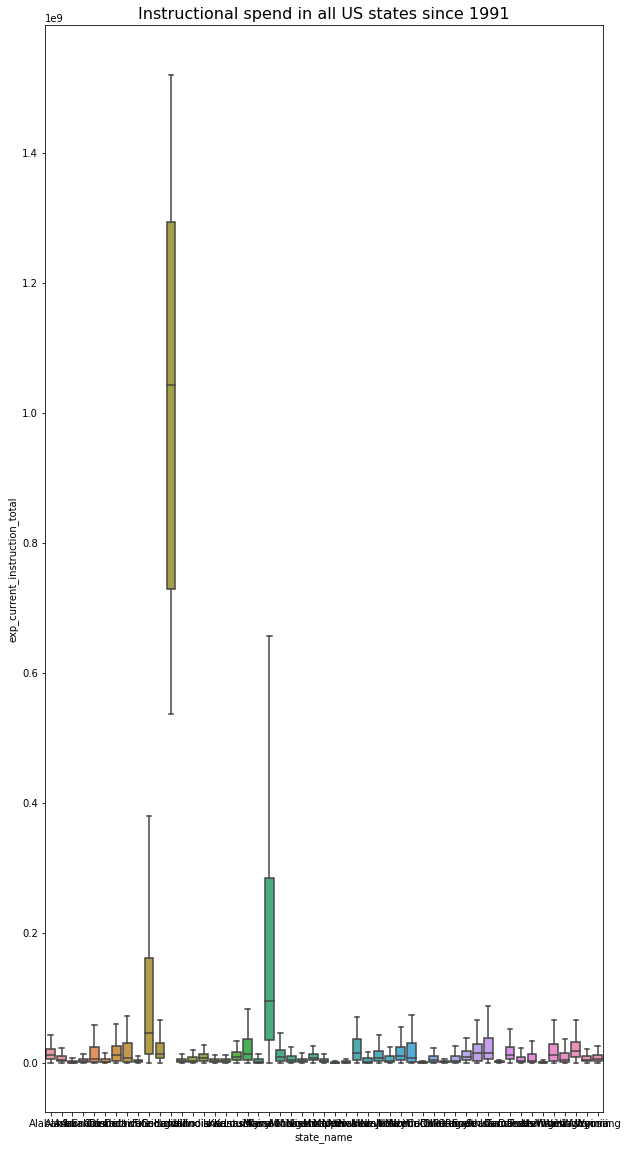

In [79]:
plt.figure(figsize=(10, 20))
sns.plot(x=new.state_name, y=new.exp_current_instruction_total, showfliers=False)
plt.title("Instructional spend in all US states since 1991", fontsize=16)  # fixme: labels
plt.show()

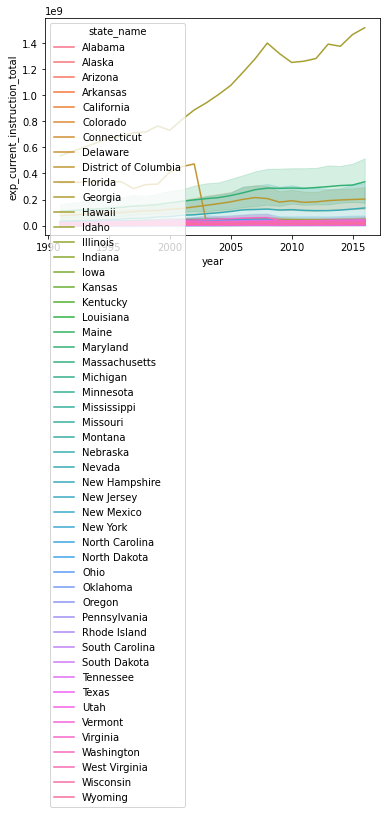

In [86]:
sns.lineplot(data=new, x='year', y='exp_current_instruction_total', hue='state_name')
plt.size=(30, 30)  # fixme: legen and size

## Race graphs

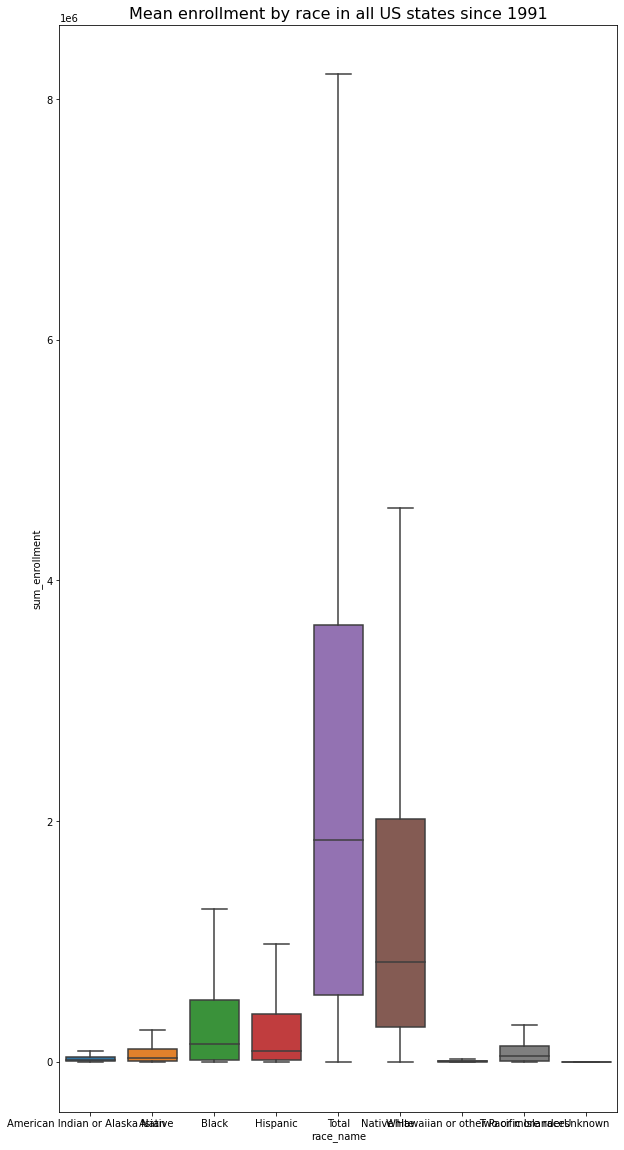

In [53]:
plt.figure(figsize=(10, 20))
sns.boxplot(x=state_by_race.race_name, y=state_by_race.sum_enrollment, showfliers=False)
plt.title("Mean enrollment by race in all US states since 1991", fontsize=16)
plt.show()

In [47]:
state_names = state_by_race.state_name.unique().tolist()
print(state_names)

['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'Bureau of Indian Education', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Department of Defense Dependent Schools (domestic)', 'Department of Defense Dependent Schools (overseas)', 'Department of Defense Education Activity', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands\xa0of the US', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


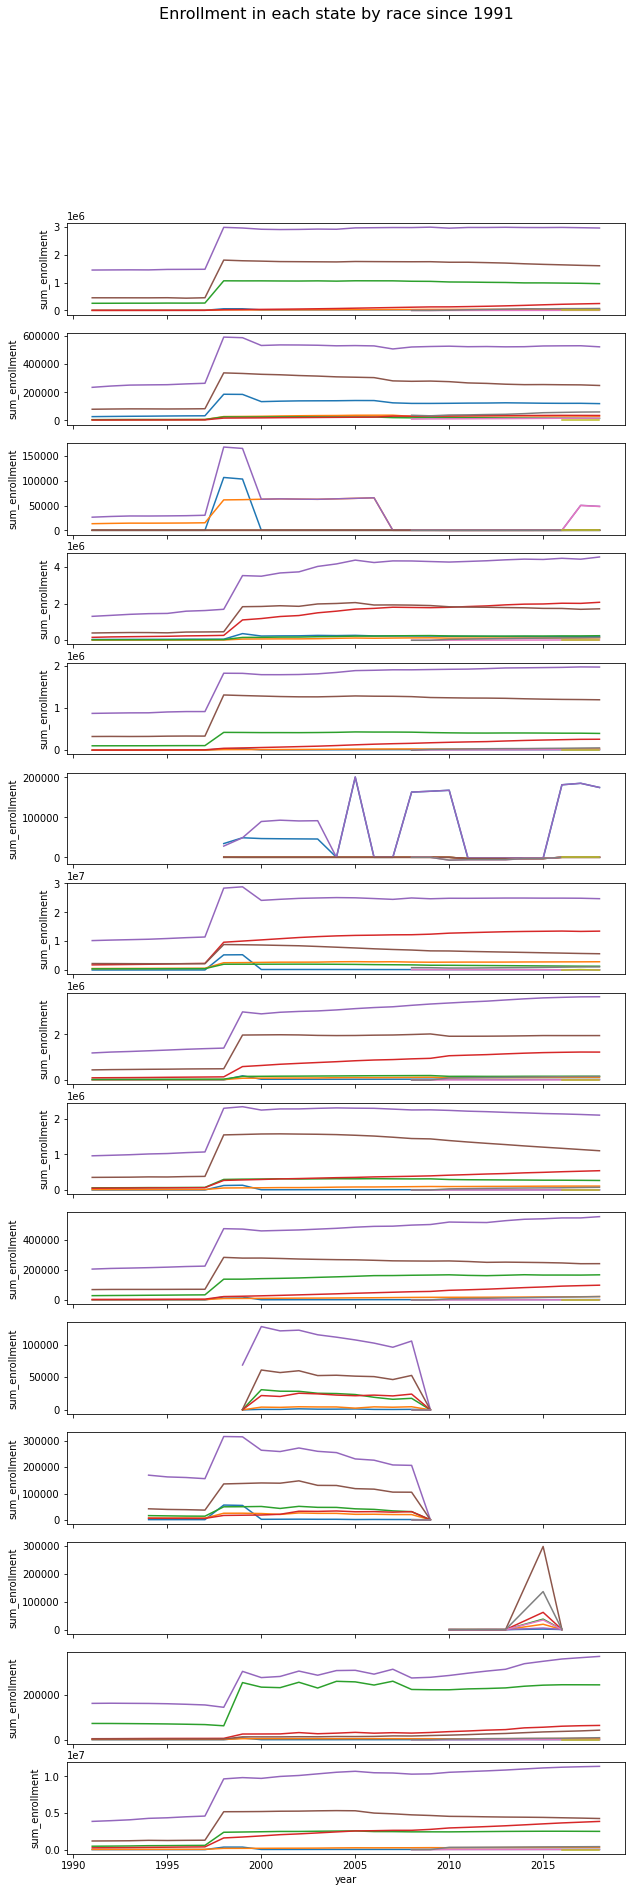

In [48]:
fig, ax = plt.subplots(nrows=len(state_names[0:15]), figsize=(10, 30),
                      sharex=True, sharey=False)
for index, state in enumerate(state_names[0:15]):
    sns.lineplot(x=state_by_race[state_by_race.state_name == state].year,
             y=state_by_race[state_by_race.state_name == state].sum_enrollment,
             hue=state_by_race[state_by_race.state_name == state].race_name,
             ax=ax[index], legend=False)
fig.suptitle("Enrollment in each state by race since 1991", fontsize=16)
plt.show()

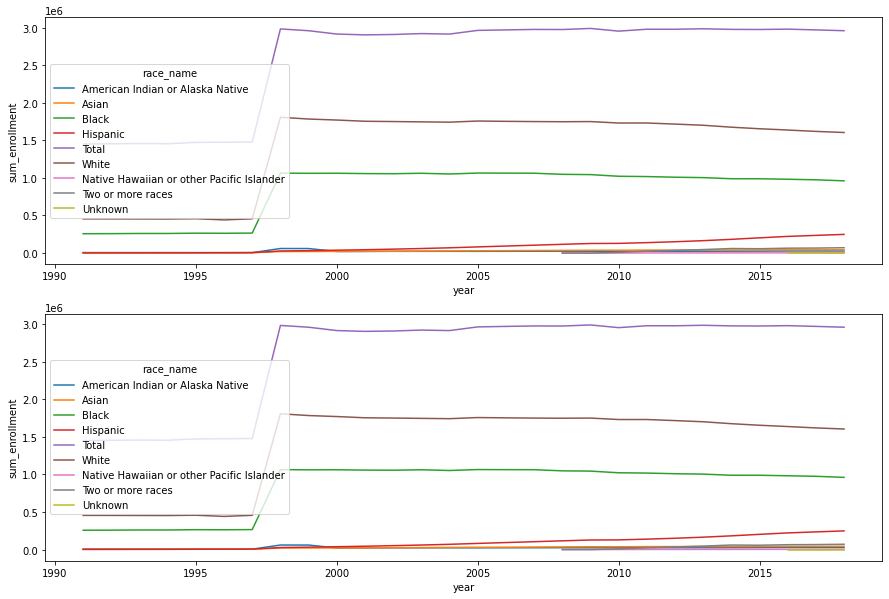

<Figure size 1080x216 with 0 Axes>